# **Assignment 5: Regression EDA, modeling**

Mitch Messier - September 24th, 2023

# Table of Contents

1. **Task I:** Import and EDA
2. **Task II:** EDA and Correlation
3. **Task III:** Partition and show summaries
4. **Task IV:** Simple Regression
5. **Task IV:** Improving model fit

In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from scipy import stats

# **Task I:** Import and EDA

In [278]:
data_url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/NA_sales_filtered.csv"
df = pd.read_csv(data_url, encoding='latin-1')

In [279]:
df.head()

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [281]:
df.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,69.819385,28.966745,70.765485,152.730969,0.354230
std,13.945811,19.098594,14.438432,545.962483,0.494404
min,13.000000,3.000000,5.000000,4.000000,0.010000
25%,61.000000,14.000000,64.000000,10.000000,0.080000
50%,72.000000,25.000000,74.000000,24.000000,0.170000
75%,80.000000,40.000000,81.000000,77.000000,0.410000
max,98.000000,113.000000,95.000000,10665.000000,3.490000


In [282]:
unique_names = df['Name'].nunique()
total_samples = df.shape[0]

In [283]:
unique_name_ratio = unique_names / total_samples

In [284]:
uniqueness_threshold = 0.8

In [285]:
if unique_name_ratio < uniqueness_threshold:
    df.drop(columns=['Name'], inplace=True)

In [286]:
explanation = "The 'Name' column has been removed because it contains a large number of unique values " \
                  f"({unique_names} unique names out of {total_samples} samples), " \
                  "which may not generalize well to new datasets. Removing this column helps improve model generalization."

In [287]:
df.head()

,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,PS,Role-Playing,T,92,20,91,1282,3.01
1,PS2,Role-Playing,T,92,53,86,1056,2.91
2,PC,Simulation,T,86,75,75,886,0.99
3,PS,Role-Playing,T,90,24,85,644,2.28
4,PS,Fighting,T,96,15,90,367,3.27


In [288]:
print("\nExplanation for Column Removal:")
explanation


Explanation for Column Removal:


"The 'Name' column has been removed because it contains a large number of unique values (4088 unique names out of 6345 samples), which may not generalize well to new datasets. Removing this column helps improve model generalization."

# **Task II:** EDA and Correlation

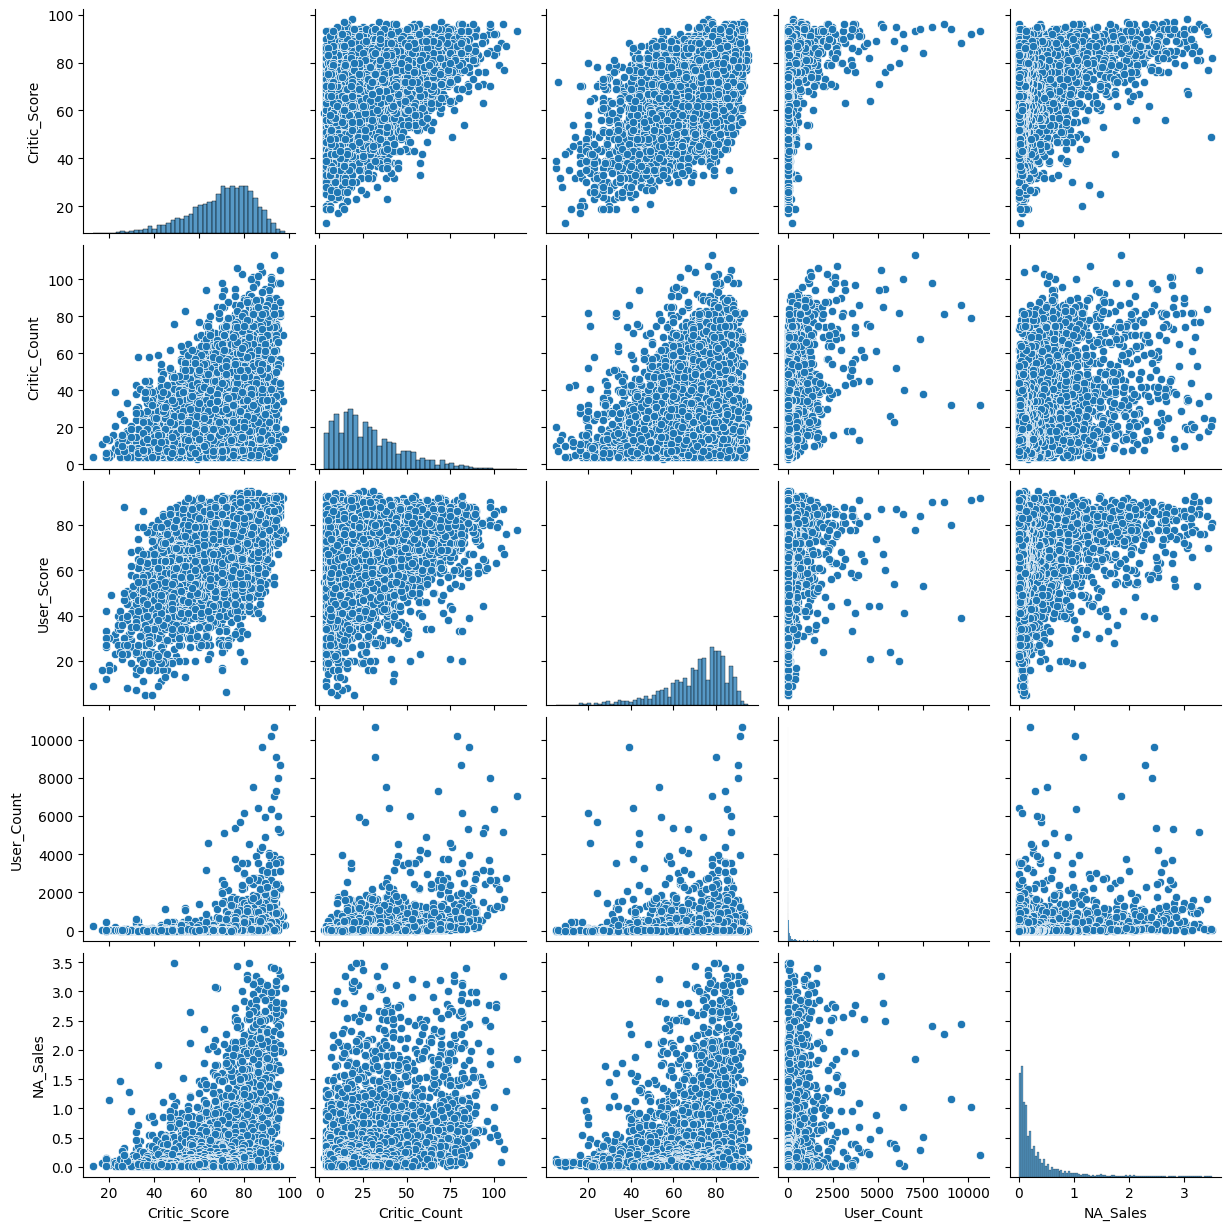

In [289]:
sns.pairplot(df)
plt.show()

In [290]:
correlation_matrix = df.corr()

<ipython-input-290-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


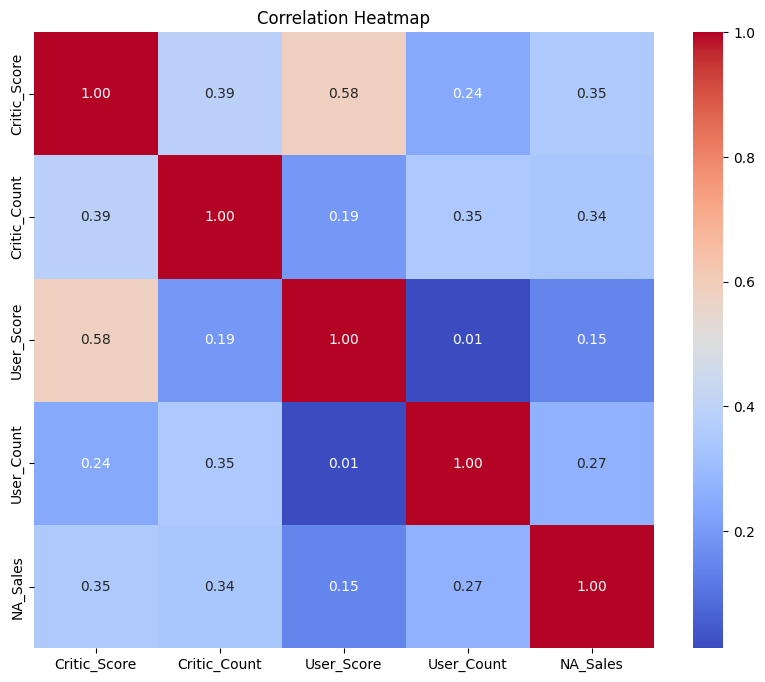

In [291]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [292]:
correlation_pairs = []

In [293]:
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:
            correlation = correlation_matrix.at[column1, column2]
            correlation_pairs.append((column1, column2, correlation))

In [294]:
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

In [295]:
strongest_positive = correlation_pairs[0]
strongest_negative = correlation_pairs[-1]

In [296]:
least_correlation = correlation_pairs[len(correlation_pairs) // 2]

In [297]:
print("Strongest Positive Correlation:")
print(f"{strongest_positive[0]} and {strongest_positive[1]} with correlation {strongest_positive[2]:.2f}")
print("\nStrongest Negative Correlation:")
print(f"{strongest_negative[0]} and {strongest_negative[1]} with correlation {strongest_negative[2]:.2f}")
print("\nLeast Correlation:")
print(f"{least_correlation[0]} and {least_correlation[1]} with correlation {least_correlation[2]:.2f}")

Strongest Positive Correlation:
Critic_Score and User_Score with correlation 0.58

Strongest Negative Correlation:
User_Count and User_Score with correlation 0.01

Least Correlation:
User_Count and NA_Sales with correlation 0.27


# **Task III:** Partition and show summaries

In [298]:
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating'], drop_first=True)

In [299]:
X = df_encoded.drop(columns=['NA_Sales'])  # Features
y = df_encoded['NA_Sales']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [301]:
print("Training Set Info:")
print(X_train.info())
print("\nTraining Set Summary:")
print(X_train.describe())


Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 334 to 860
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Critic_Score        4441 non-null   int64
 1   Critic_Count        4441 non-null   int64
 2   User_Score          4441 non-null   int64
 3   User_Count          4441 non-null   int64
 4   Platform_DS         4441 non-null   uint8
 5   Platform_GBA        4441 non-null   uint8
 6   Platform_GC         4441 non-null   uint8
 7   Platform_PC         4441 non-null   uint8
 8   Platform_PS         4441 non-null   uint8
 9   Platform_PS2        4441 non-null   uint8
 10  Platform_PS3        4441 non-null   uint8
 11  Platform_PS4        4441 non-null   uint8
 12  Platform_PSP        4441 non-null   uint8
 13  Platform_PSV        4441 non-null   uint8
 14  Platform_Wii        4441 non-null   uint8
 15  Platform_WiiU       4441 non-null   uint8
 16  Platform_X360       44

In [302]:
print("\nTesting Set Info:")
print(X_test.info())
print("\nTesting Set Summary:")
print(X_test.describe())


Testing Set Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 730 to 3555
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Critic_Score        1904 non-null   int64
 1   Critic_Count        1904 non-null   int64
 2   User_Score          1904 non-null   int64
 3   User_Count          1904 non-null   int64
 4   Platform_DS         1904 non-null   uint8
 5   Platform_GBA        1904 non-null   uint8
 6   Platform_GC         1904 non-null   uint8
 7   Platform_PC         1904 non-null   uint8
 8   Platform_PS         1904 non-null   uint8
 9   Platform_PS2        1904 non-null   uint8
 10  Platform_PS3        1904 non-null   uint8
 11  Platform_PS4        1904 non-null   uint8
 12  Platform_PSP        1904 non-null   uint8
 13  Platform_PSV        1904 non-null   uint8
 14  Platform_Wii        1904 non-null   uint8
 15  Platform_WiiU       1904 non-null   uint8
 16  Platform_X360       1

Text(0, 0.5, 'Frequency')

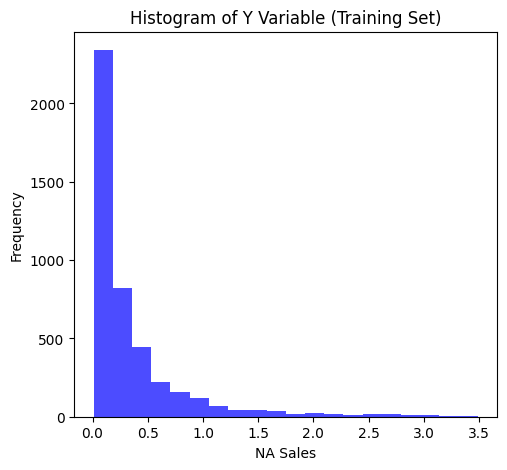

In [303]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Y Variable (Training Set)")
plt.xlabel("NA Sales")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

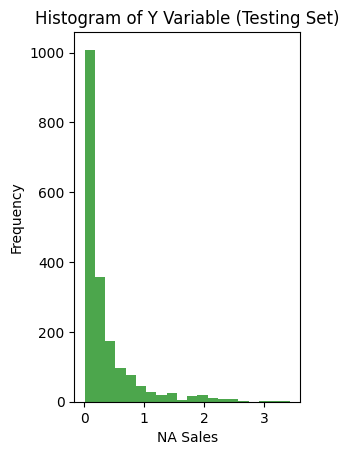

In [304]:
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, color='green', alpha=0.7)
plt.title("Histogram of Y Variable (Testing Set)")
plt.xlabel("NA Sales")
plt.ylabel("Frequency")

In [305]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# **Task IV:** Simple Regression

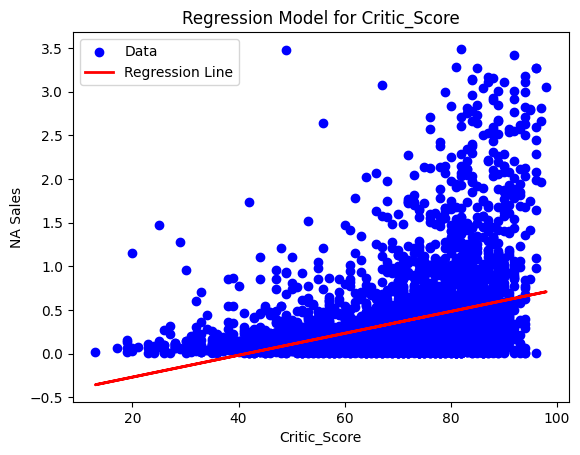

Model for Critic_Score:
R-squared: 0.1235
P-value: 0.0000
Slope (coef): 0.0125




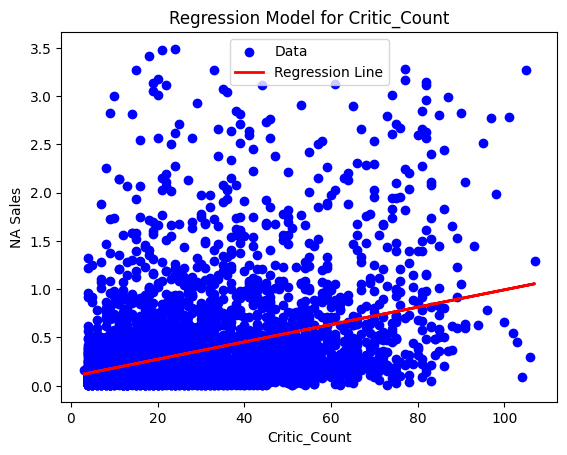

Model for Critic_Count:
R-squared: 0.1185
P-value: 0.0000
Slope (coef): 0.0090




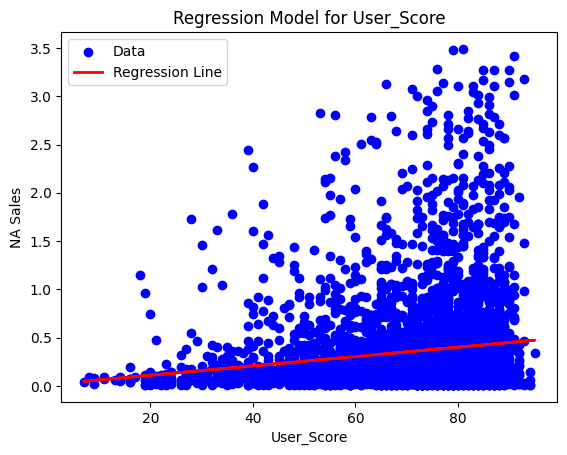

Model for User_Score:
R-squared: 0.0195
P-value: 0.0000
Slope (coef): 0.0048




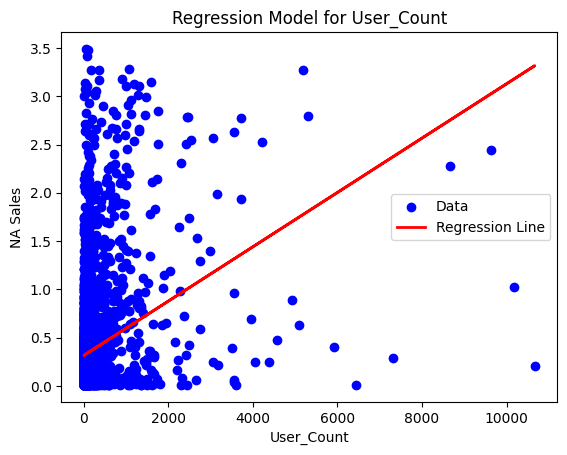

Model for User_Count:
R-squared: 0.0849
P-value: 0.0000
Slope (coef): 0.0003




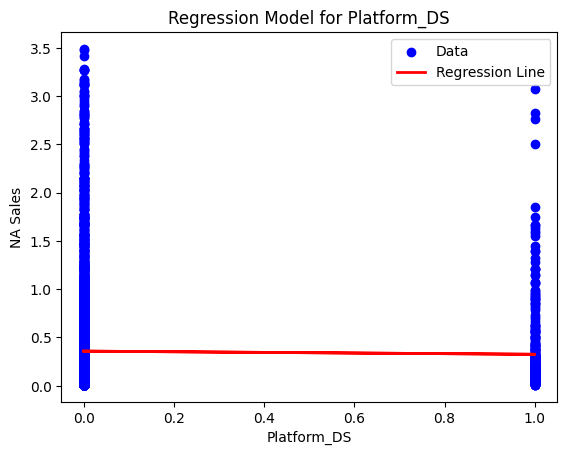

Model for Platform_DS:
R-squared: 0.0003
P-value: 0.2538
Slope (coef): -0.0327




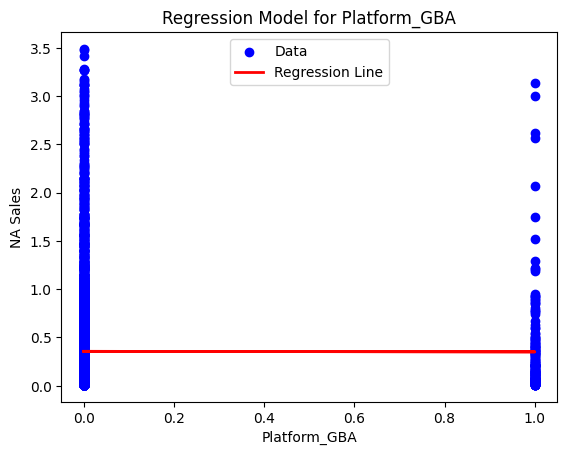

Model for Platform_GBA:
R-squared: 0.0000
P-value: 0.8905
Slope (coef): -0.0054




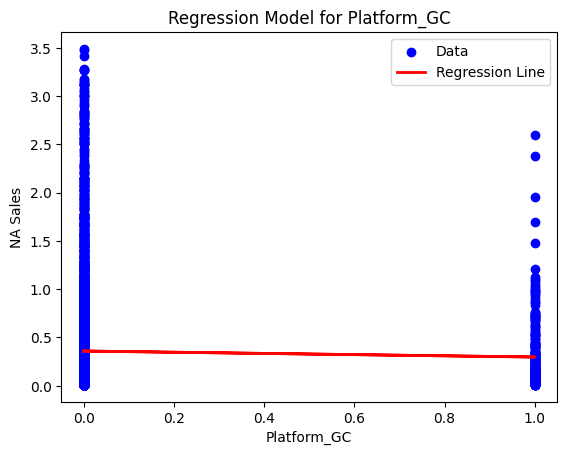

Model for Platform_GC:
R-squared: 0.0008
P-value: 0.0537
Slope (coef): -0.0622




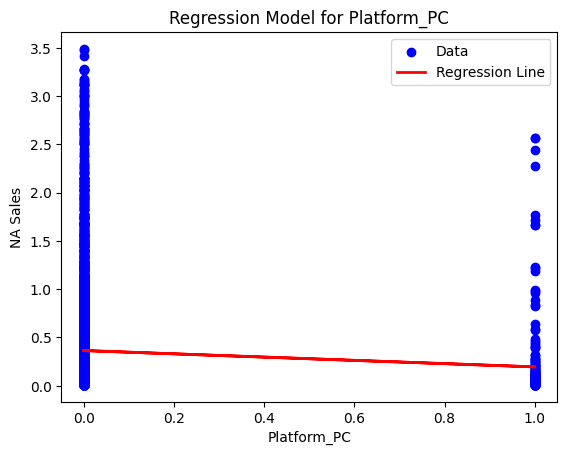

Model for Platform_PC:
R-squared: 0.0054
P-value: 0.0000
Slope (coef): -0.1692




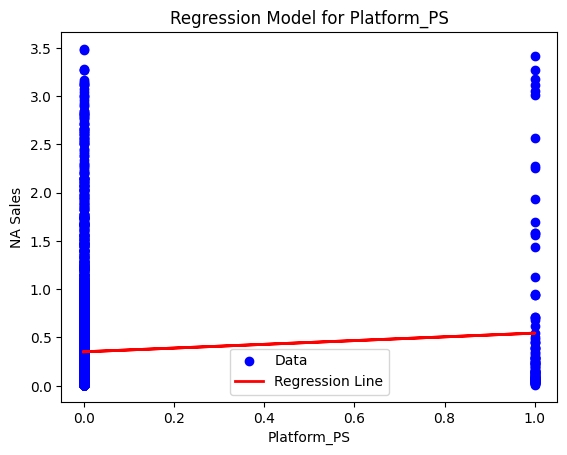

Model for Platform_PS:
R-squared: 0.0035
P-value: 0.0001
Slope (coef): 0.1935




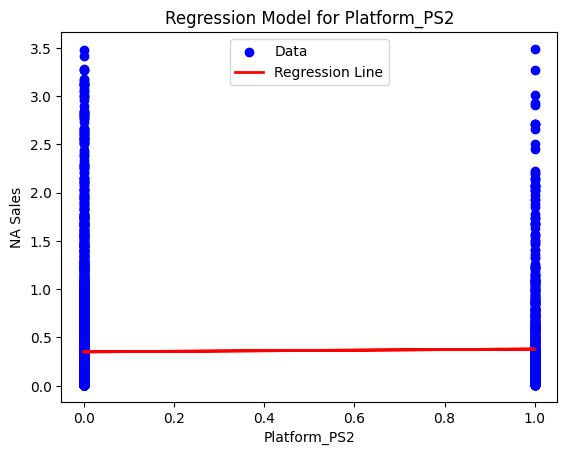

Model for Platform_PS2:
R-squared: 0.0005
P-value: 0.1347
Slope (coef): 0.0293




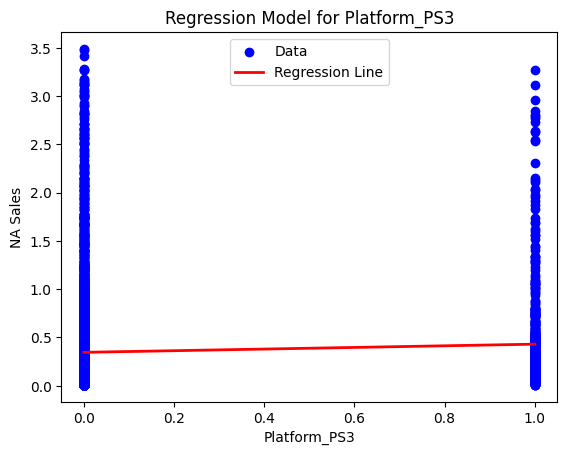

Model for Platform_PS3:
R-squared: 0.0030
P-value: 0.0003
Slope (coef): 0.0847




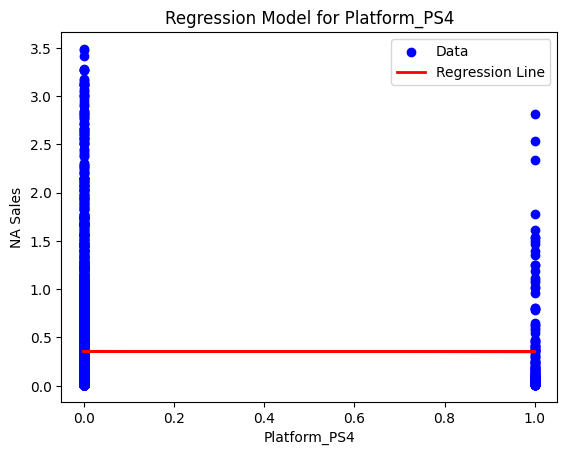

Model for Platform_PS4:
R-squared: 0.0000
P-value: 0.9291
Slope (coef): -0.0037




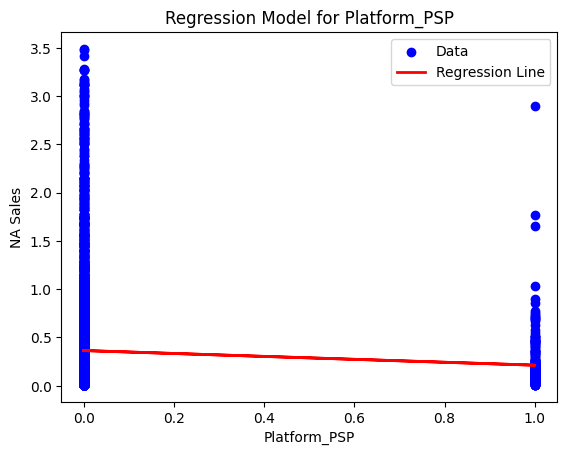

Model for Platform_PSP:
R-squared: 0.0048
P-value: 0.0000
Slope (coef): -0.1515




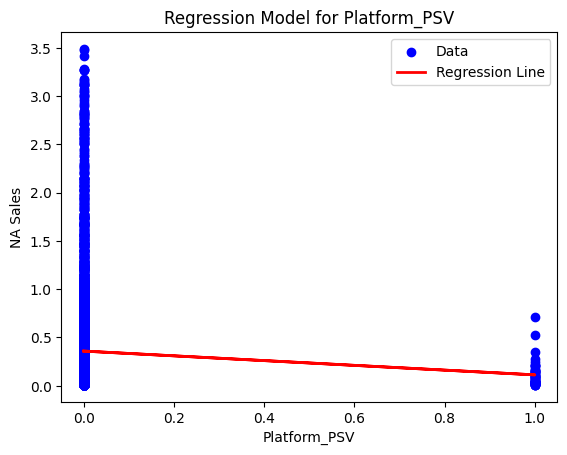

Model for Platform_PSV:
R-squared: 0.0028
P-value: 0.0004
Slope (coef): -0.2463




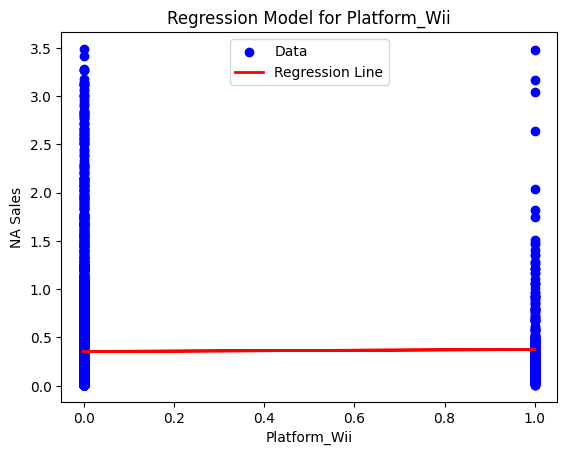

Model for Platform_Wii:
R-squared: 0.0001
P-value: 0.4497
Slope (coef): 0.0215




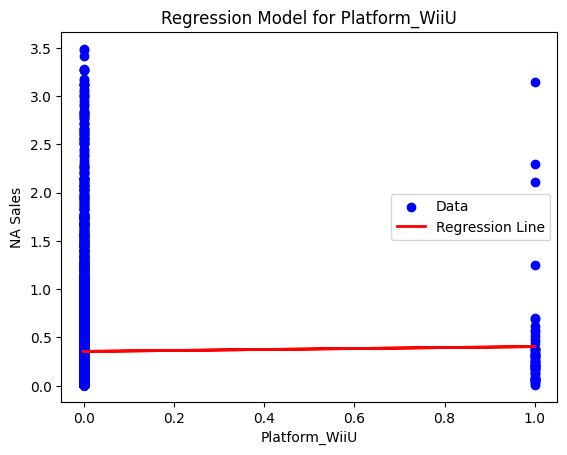

Model for Platform_WiiU:
R-squared: 0.0001
P-value: 0.4660
Slope (coef): 0.0499




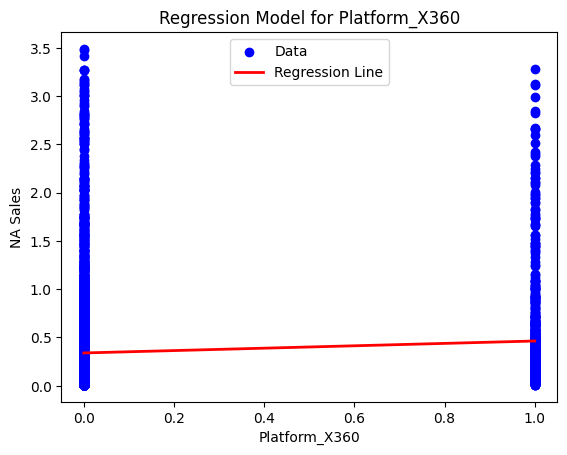

Model for Platform_X360:
R-squared: 0.0071
P-value: 0.0000
Slope (coef): 0.1238




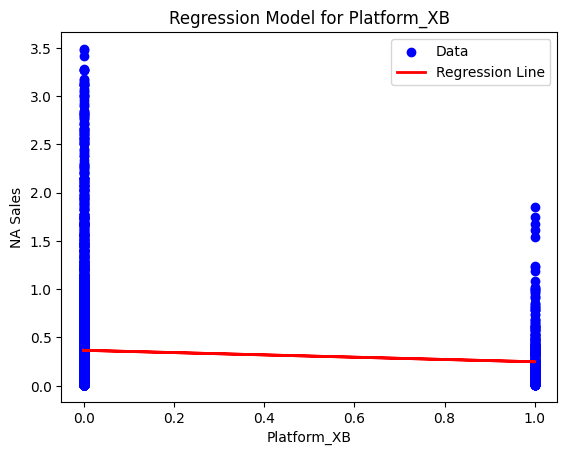

Model for Platform_XB:
R-squared: 0.0047
P-value: 0.0000
Slope (coef): -0.1187




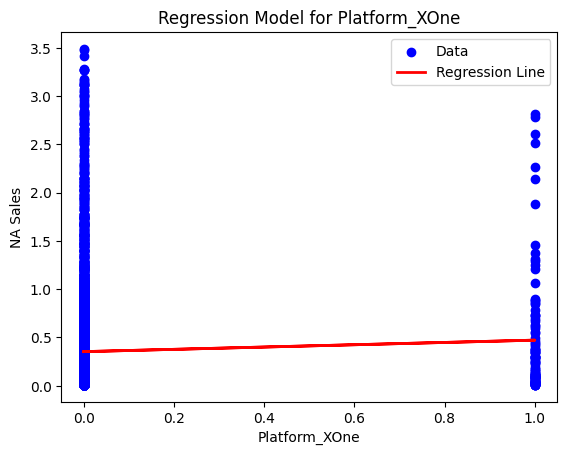

Model for Platform_XOne:
R-squared: 0.0013
P-value: 0.0159
Slope (coef): 0.1190




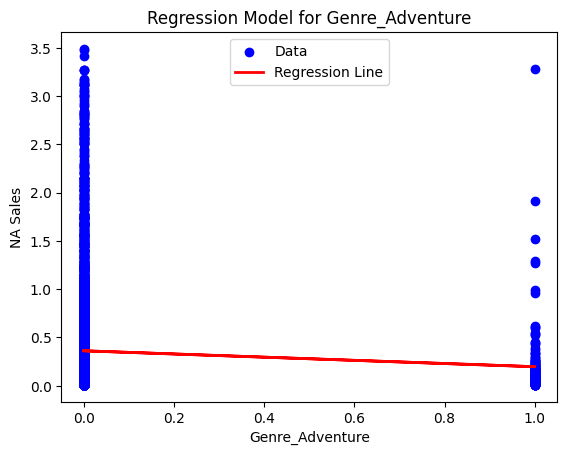

Model for Genre_Adventure:
R-squared: 0.0038
P-value: 0.0000
Slope (coef): -0.1648




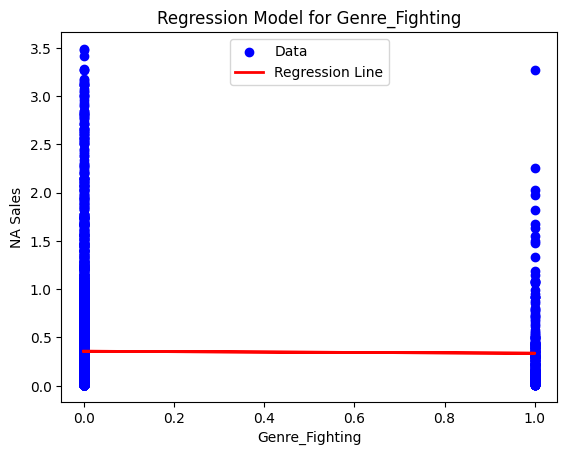

Model for Genre_Fighting:
R-squared: 0.0001
P-value: 0.5163
Slope (coef): -0.0206




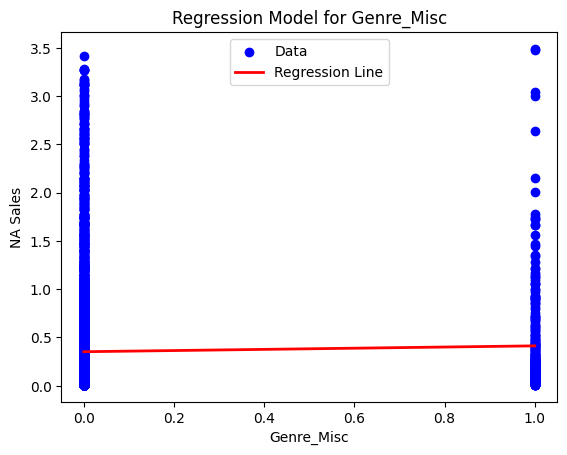

Model for Genre_Misc:
R-squared: 0.0008
P-value: 0.0540
Slope (coef): 0.0607




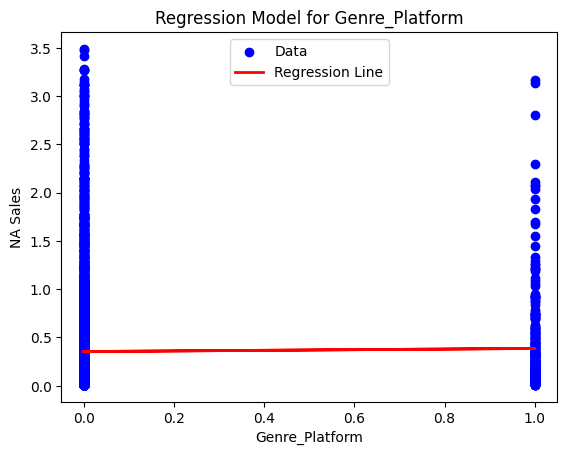

Model for Genre_Platform:
R-squared: 0.0003
P-value: 0.2918
Slope (coef): 0.0324




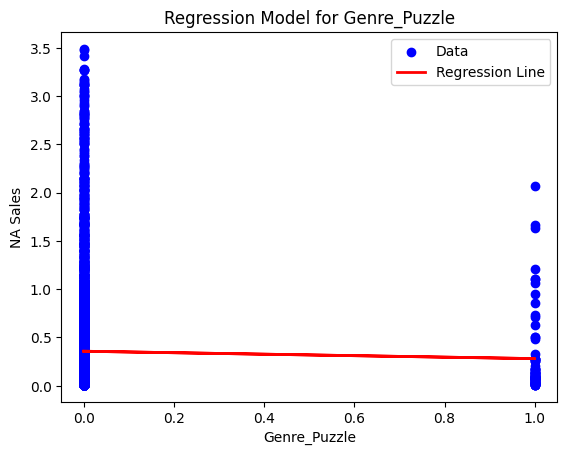

Model for Genre_Puzzle:
R-squared: 0.0004
P-value: 0.1800
Slope (coef): -0.0765




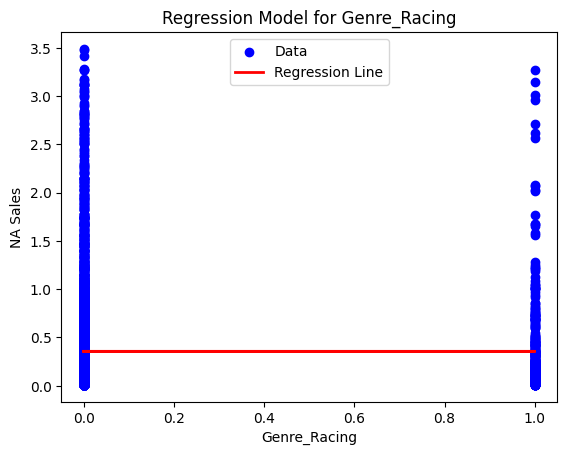

Model for Genre_Racing:
R-squared: 0.0000
P-value: 0.9989
Slope (coef): 0.0000




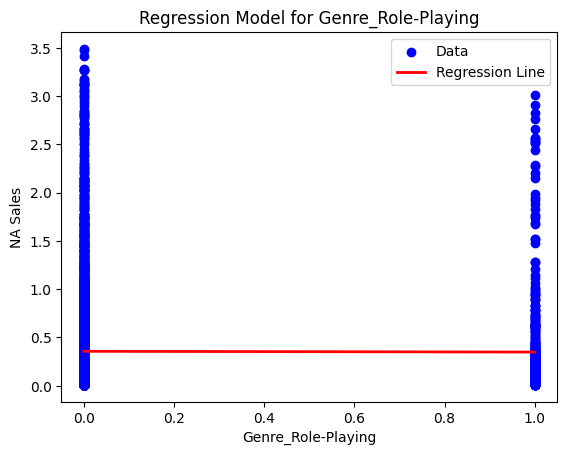

Model for Genre_Role-Playing:
R-squared: 0.0000
P-value: 0.7414
Slope (coef): -0.0082




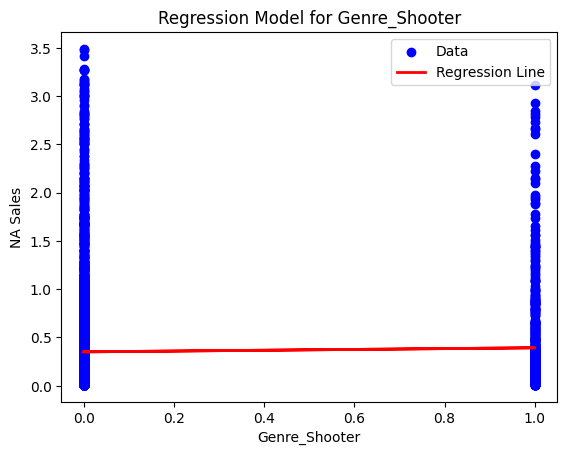

Model for Genre_Shooter:
R-squared: 0.0008
P-value: 0.0644
Slope (coef): 0.0422




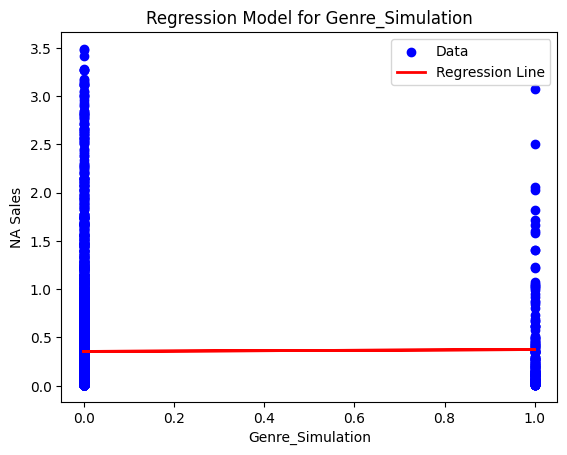

Model for Genre_Simulation:
R-squared: 0.0001
P-value: 0.6145
Slope (coef): 0.0195




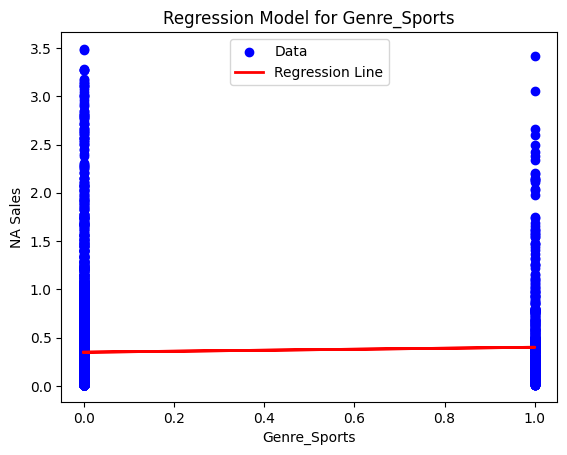

Model for Genre_Sports:
R-squared: 0.0013
P-value: 0.0167
Slope (coef): 0.0513




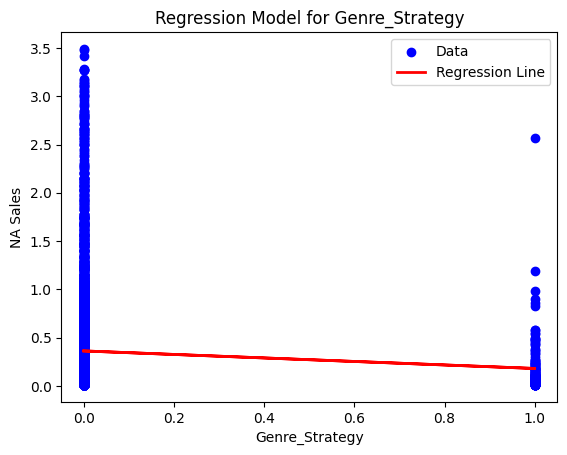

Model for Genre_Strategy:
R-squared: 0.0041
P-value: 0.0000
Slope (coef): -0.1816




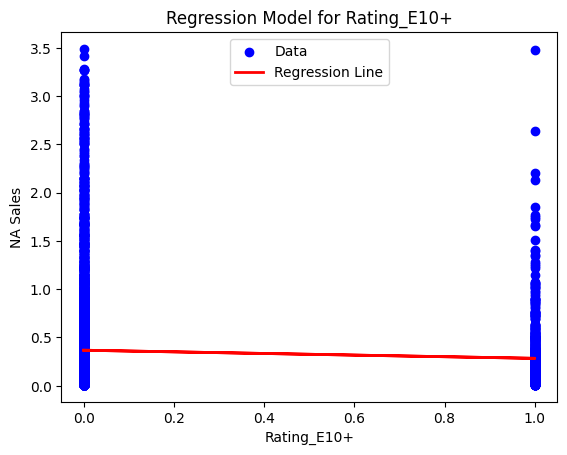

Model for Rating_E10+:
R-squared: 0.0034
P-value: 0.0001
Slope (coef): -0.0841




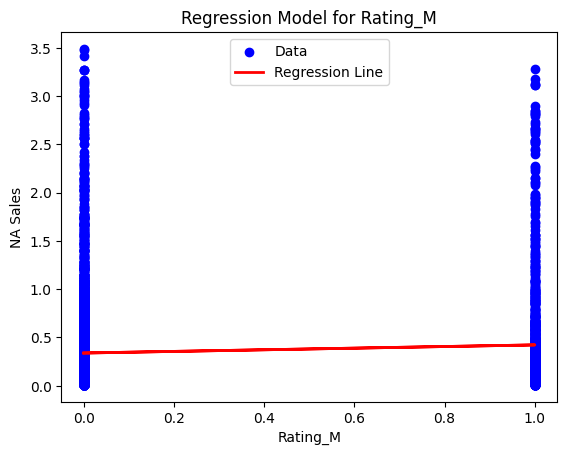

Model for Rating_M:
R-squared: 0.0046
P-value: 0.0000
Slope (coef): 0.0841




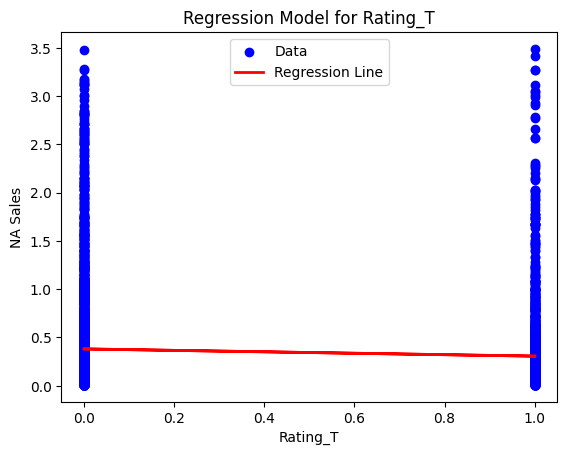

Model for Rating_T:
R-squared: 0.0050
P-value: 0.0000
Slope (coef): -0.0746




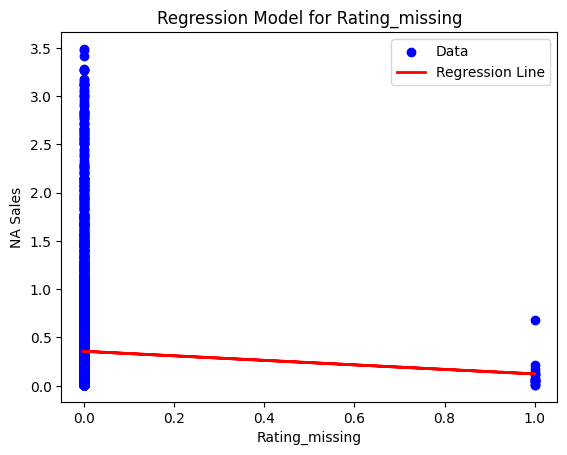

Model for Rating_missing:
R-squared: 0.0008
P-value: 0.0610
Slope (coef): -0.2344




In [306]:
def train_and_plot_model(X, y, column_name):
    model = LinearRegression()
    model.fit(X, y)

    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
    plt.title(f"Regression Model for {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('NA Sales')
    plt.legend()
    plt.show()

    slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y)

    print(f"Model for {column_name}:")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Slope (coef): {slope:.4f}")
    print("\n")

# Assuming 'X_train' contains your DataFrame with input features
# Assuming 'y_train' contains your Series with the target variable

# Iterate through each column in X_train
for column in X_train.columns:
    train_and_plot_model(X_train[[column]], y_train, column)

# **Task IV:** Improving model fit

In [313]:
df.columns

Index(['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'NA_Sales'],
      dtype='object')

In [318]:
X_train['Critic_Score_log'] = X_train['Critic_Score'].apply(lambda x: max(1, x))  # Avoid taking the log of zero or negative values
X_test['Critic_Score_log'] = X_test['Critic_Score'].apply(lambda x: max(1, x))  # Apply the same transformation to the test set

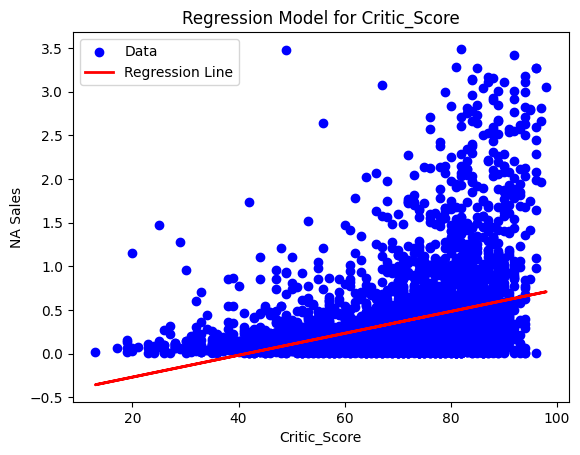

Model for Critic_Score:
R-squared: 0.1235
P-value: 0.0000
Slope (coef): 0.0125




In [320]:
train_and_plot_model(X_train[['Critic_Score']], y_train, 'Critic_Score')

# Convert to HTML

In [321]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [322]:
# copy the ipynb to the local working directory
# This file name must change to be the name of your Lab file!
!cp "/content/drive/MyDrive/Colab Notebooks/A5_Messier_Mitch.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A5_Messier_Mitch.ipynb"

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/A5_Messier_Mitch.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern 'A5_Messier_Mitch.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    A